Travail 3:
- code pour « def » implémenté (3 %)
- code « Seaborn » implémenté (2 %)
- code LDA implémenté (2 %)
- code SVM implémenté (2 %)
- code KNN implémenté (2 %) 
- code RF implémenté (2 %)
- code PCA implémenté (2 %)
- remise en fichier .py ou .ipynb sur GitHub, le plus tard à 23h59 
du jour prévu. Chaque jour après le temps alloué coûte 0.75%.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

import matplotlib

# sns.set()
import sklearn

from sklearn.datasets import fetch_lfw_people, make_blobs, make_circles, load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC         #Support vector classifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Identités de genre - genderid

- 0, Man
- 1, woman
- 2, indigenous or other cultural identity (ex: two spirit)
- 3, non binary, genderqueer, agender or a similar identity

## Stratégies de coopération (WCC)

##### WCC = 43-item Ways of Coping Checklist (Vitaliano, 1985) 
It Measures coping strategies in reference to stressful situations using a 4-point Likert scale ranging from 1 (“not used”) to 4 (“used a great deal”). In the current study, participants will provide behaviors enacted for situations in the current COVID-19 crisis.

Five sub-scales are extracted :

- WCCP = Problem Focused Coping - Total
- WCC_SS = Seeking Social Support Coping - Total
- WCC_B = Blamed Self Coping - Total
- WCC_W = Wishful Thinking Coping - Total
- WCC_A = Avoidance Coping - Total

## Mesures de résilience (ARM)

Resilience here refers to the dynamic process that promotes positive adaptation or wellness among individuals exposed to adversity (Cicchetti & Garmezy, 1993; Luthar, Cicchetti, & Becker, 2000; Masten, Best, & Garmezy, 1990; Rutter, 2012)

##### The Adult Resilience Measure-Revised (ARM-R) 
It is a 17-item questionnaire assessing resilience in adults. Its items are scored on a 5-point Likert scale ranging from 1 (not at all) to 5 (a lot). 
Total score: Total sum scores are calculated, with a possible range from 28 to 140.

In addition to an overall resilience score (ARM_Total), the 17-item versions of the ARM-R, scores for two subscales can be derived. 
They are for: Personal resilience, and Relational (ARM-R) resilience
 
- ARM_Total = Adult Resilience - Total
- ARM_P Adult Resilience - Personal
Personal resilience includes intrapersonal and interpersonal items. These are linked, as both dimensions depend on individuals’ social ecologies to reinforce their resilience.

- ARM_R = Adult Resilience - Relational
Relational resilience relates to characteristics associated with the important relationships shared with either a primary caregiver or a partner or family


In [2]:
#crée le dataframe 
df = pd.read_csv('JulieDandrimont_données_psy3019-H23_20230212_Pandemic.csv')


#colonnes 
df = df.replace(' ', np.nan)
#colonnes

In [3]:
#df #= df.dropna()
df = df.iloc[:,2:23]
colonnes = df.columns.tolist()

df

,id,date,timepandemic,age,raceD,canada,provinceCA,sex,genderid,genderD,...,LGBTQ,LGBT_Subgroup,ARM_P,ARM_R,ARM_Total,WCC_P,WCC_SS,WCC_B,WCC_W,WCC_A
0,1,7/21/2020 16:37:33,130,28,1,1,11,1,1,0,...,1,3,47,33,80,18,10,3,8,10
1,2,7/21/2020 17:13:22,130,30,0,1,9,1,1,0,...,0,0,41,25,66,36,16,3,10,11
2,3,7/21/2020 17:26:48,130,32,1,1,11,1,1,0,...,0,0,33,24,57,17,10,3,14,16
3,4,7/21/2020 17:46:30,130,36,1,1,11,0,0,0,...,1,2,47,33,80,38,16,3,10,17
4,5,7/21/2020 17:51:06,130,58,1,1,11,0,0,0,...,0,0,38,23,61,35,16,3,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,9617,9/1/2022 8:15:27,902,54,1,1,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9611,9618,9/1/2022 14:07:56,902,43,1,1,11,1,1,0,...,0,0,38,32,70,NaN,NaN,NaN,NaN,NaN
9612,9619,9/6/2022 16:59:57,907,71,1,1,11,1,1,0,...,0,0,40,27,67,16,9,3,8,12
9613,9620,9/8/2022 8:55:40,909,54,0,1,11,1,1,0,...,0,0,32,23,55,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.dropna()
df

,id,date,timepandemic,age,raceD,canada,provinceCA,sex,genderid,genderD,...,LGBTQ,LGBT_Subgroup,ARM_P,ARM_R,ARM_Total,WCC_P,WCC_SS,WCC_B,WCC_W,WCC_A
0,1,7/21/2020 16:37:33,130,28,1,1,11,1,1,0,...,1,3,47,33,80,18,10,3,8,10
1,2,7/21/2020 17:13:22,130,30,0,1,9,1,1,0,...,0,0,41,25,66,36,16,3,10,11
2,3,7/21/2020 17:26:48,130,32,1,1,11,1,1,0,...,0,0,33,24,57,17,10,3,14,16
3,4,7/21/2020 17:46:30,130,36,1,1,11,0,0,0,...,1,2,47,33,80,38,16,3,10,17
4,5,7/21/2020 17:51:06,130,58,1,1,11,0,0,0,...,0,0,38,23,61,35,16,3,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9566,8/27/2022 15:40:25,897,56,1,1,11,1,1,0,...,0,0,33,27,60,38,18,7,12,17
9572,9579,8/27/2022 18:00:47,897,55,1,1,11,1,1,0,...,0,0,33,20,53,36,14,3,12,13
9609,9616,8/31/2022 20:12:22,901,42,1,1,11,1,1,0,...,0,0,39,18,57,50,25,3,22,20
9612,9619,9/6/2022 16:59:57,907,71,1,1,11,1,1,0,...,0,0,40,27,67,16,9,3,8,12


In [5]:
print(df.isnull().sum())

id                 0
date               0
timepandemic       0
age                0
raceD              0
canada             0
provinceCA         0
sex                0
genderid           0
genderD            0
SexOrientationR    0
LGBTQ              0
LGBT_Subgroup      0
ARM_P              0
ARM_R              0
ARM_Total          0
WCC_P              0
WCC_SS             0
WCC_B              0
WCC_W              0
WCC_A              0
dtype: int64


In [6]:
df['genderid'].value_counts()

1    3602
0    1177
3     325
2      16
Name: genderid, dtype: int64

In [7]:
#sample = df.sample(n=100 ) #,random_state=42

sample = df.groupby('genderid').apply(lambda x: x.sample(frac=0.05))

# Redéfinir les index des lignes de l'échantillon
sample = sample.reset_index(drop=True)

sample

,id,date,timepandemic,age,raceD,canada,provinceCA,sex,genderid,genderD,...,LGBTQ,LGBT_Subgroup,ARM_P,ARM_R,ARM_Total,WCC_P,WCC_SS,WCC_B,WCC_W,WCC_A
0,5534,10/3/2021 15:14:28,569,36,1,1,11,0,0,0,...,0,0,45,31,76,41,17,3,21,16
1,5985,11/2/2021 13:39:01,599,29,1,1,11,0,0,0,...,1,2,40,22,62,36,21,3,9,10
2,2207,10/16/2020 22:00:04,217,24,1,1,11,0,0,0,...,0,0,37,28,65,29,17,5,25,25
3,5848,10/23/2021 13:39:13,589,68,1,1,1,0,0,0,...,0,0,33,31,64,26,11,4,10,19
4,2531,11/6/2020 15:59:28,238,33,1,1,11,0,0,0,...,1,2,45,31,76,28,16,5,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,4667,8/5/2021 16:15:34,510,29,1,1,11,0,3,1,...,1,1,41,29,70,49,23,12,31,24
252,6012,11/5/2021 9:08:29,602,22,1,1,5,1,3,1,...,1,1,35,22,57,35,23,5,28,21
253,4901,8/15/2021 16:15:08,520,20,1,1,9,1,3,1,...,1,1,34,20,54,33,12,7,24,23
254,8549,4/19/2022 9:39:01,767,21,1,1,12,1,3,1,...,1,1,31,21,52,31,16,3,20,26


In [8]:
sample['genderid'].value_counts()

1    180
0     59
3     16
2      1
Name: genderid, dtype: int64

In [9]:
print(colonnes.index('WCC_P'), colonnes.index('WCC_A'))

16 20


In [27]:
x = sample.iloc[:,16:21].values
y = sample['genderid'].values

feature_dict = {i:label for i,label in zip(
                range(5),
                  ('WCC_P',
                  'WCC_SS',
                  'WCC_B',
                  'WCC_W', 
                  'WCC_A',))}

label_dict = {1: 'Man', 2: 'Woman', 3:'Other cultural Id', 4:'Non Binary'}

array([['41', '17', '3', '21', '16'],
       ['36', '21', '3', '9', '10'],
       ['29', '17', '5', '25', '25'],
       ...,
       ['33', '12', '7', '24', '23'],
       ['31', '16', '3', '20', '26'],
       ['36', '21', '5', '23', '23']], dtype=object)

# LDA

In [28]:
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

In [33]:
x[:,0][y==1]

TypeError: string indices must be integers

In [12]:
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(x, y)



In [13]:
def plot_lda_from_scikit(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,5),('^', 's', 'o','x'),('blue', 'blue', 'green','green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

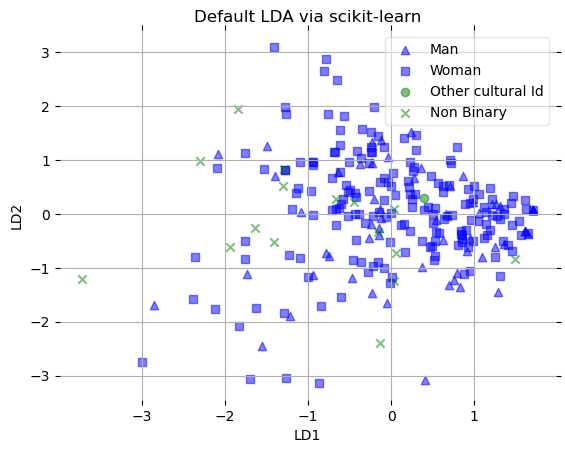

In [14]:
plot_lda_from_scikit(X_lda_sklearn, title='Default LDA via scikit-learn')

In [18]:
pred = sklearn_lda.predict(x)
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       1.00      0.02      0.03        59
           2       0.71      0.99      0.83       180
           3       0.00      0.00      0.00         1
           4       0.33      0.06      0.11        16

    accuracy                           0.71       256
   macro avg       0.51      0.27      0.24       256
weighted avg       0.75      0.71      0.60       256



C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\latte.MILLENIA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# on importe le module pour séparer les données 
from sklearn.model_selection import train_test_split

# On divise le dataset en partie d'entrainement ou de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# On crée l'objet lda qui contient la méthode pour appliquer le LDA et on entraine le modèle sur les données 
# d'entrainement
lda = LDA()
lda.fit(x_train, y_train)

#On effectue des prédictions de classe sur les données test en utilisant lda 
y_pred = lda.predict(x_test)

# on importe le module permettant d'évaluer la qualité de la prédiction 
from sklearn.metrics import confusion_matrix, accuracy_score

# On calcule l'exactitude des prédictions sur les données tests
accuracy = accuracy_score(y_test, y_pred)
print("Excatitude des prédiction : ", accuracy)

# On affiche la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion : \n", conf_matrix)

Excatitude des prédiction :  0.6923076923076923
Matrice de confusion : 
 [[ 0 13  0  0]
 [ 0 36  0  0]
 [ 0  1  0  0]
 [ 0  2  0  0]]


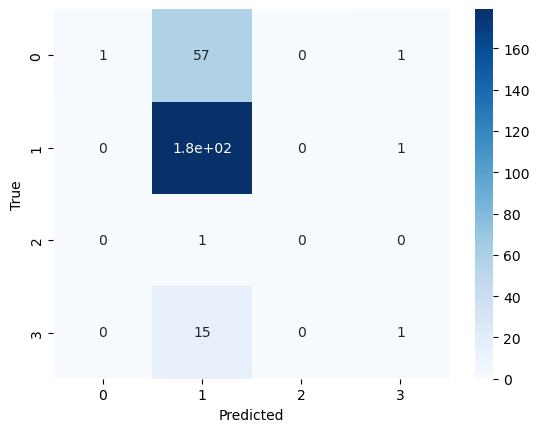

In [21]:
# Créer une matrice de confusion à partir des prédictions et des étiquettes de sortie
cm = confusion_matrix(y, pred)

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

# Ajouter des étiquettes pour les axes x et y
plt.xlabel('Predicted')
plt.ylabel('True')

# Afficher le graphique
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

In [ ]:

model.support_vectors_

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #obtenir les axes actuels
    xlim = ax.get_xlim() #renvoie les limites de la vue de l'axe des x
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)              #créer une grille rectangulaire
    xy = np.vstack([X.ravel(), Y.ravel()]).T   #empiler des tableaux en séquence verticalement
    #ravel = Retourne un tableau / une liste aplatie; 
    #C'est équivalent à reshape(-1, order = order)
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

LDA implémenté (2 %)


SVM implémenté (2 %)


KNN implémenté (2 %) 


RF implémenté (2 %)


PCA implémenté (2 %)